# Ánalise da base de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_df = pd.read_csv("C:/players_fifa22.csv", sep=',', low_memory=False)
original_df.head(10)

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,...,87,83,87,67,69,67,64,63,64,22
2,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
3,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92
4,192985,K. De Bruyne,Kevin De Bruyne,30,181,70,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,91,91,...,91,91,91,82,83,82,78,72,78,24
5,190871,Neymar Jr,Neymar da Silva Santos Jr.,29,175,68,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,91,91,...,91,85,91,70,66,70,65,53,65,23
6,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,...,89,81,89,66,62,66,63,56,63,23
7,215914,N. Kanté,N'Golo Kanté,30,168,70,https://cdn.sofifa.com/players/215/914/22_60.png,France,90,90,...,82,85,82,88,90,88,88,87,88,23
8,202126,H. Kane,Harry Kane,27,188,89,https://cdn.sofifa.com/players/202/126/22_60.png,England,90,90,...,87,85,87,70,71,70,67,64,67,23
9,192448,M. ter Stegen,Marc-André ter Stegen,29,187,85,https://cdn.sofifa.com/players/192/448/22_60.png,Germany,90,92,...,42,48,42,36,44,36,34,36,34,91


## Pré-processamento

### Número de linhas e colunas

In [3]:
original_df.shape

(19248, 90)

### Tratando os dados

In [4]:
original_df.isna().sum()

ID           0
Name         0
FullName     0
Age          0
Height       0
            ..
RWBRating    0
LBRating     0
CBRating     0
RBRating     0
GKRating     0
Length: 90, dtype: int64

*Como todas as colunas possuem valores, será filtrado apenas as principais colunas para a avaliação*

In [5]:
df_semPhotoUrl = original_df.drop(columns=['PhotoUrl'])
lista = list()
for i in range(10, 90):
    lista.append(i)
df_Tratado = df_semPhotoUrl.drop(original_df.columns[lista], axis = 1)
df_Tratado

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential
0,158023,L. Messi,Lionel Messi,34,170,72,Argentina,93,93
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,Poland,92,92
2,231747,K. Mbappé,Kylian Mbappé,22,182,73,France,91,95
3,200389,J. Oblak,Jan Oblak,28,188,87,Slovenia,91,93
4,192985,K. De Bruyne,Kevin De Bruyne,30,181,70,Belgium,91,91
...,...,...,...,...,...,...,...,...,...
19243,259646,A. Shaikh,Arsh Shaikh,18,186,74,India,47,67
19244,260398,N. Saliba,Nathan-Dylan Saliba,17,173,71,Canada,47,69
19245,261667,M. O'Brien,Matthew O'Brien,18,176,71,Republic of Ireland,47,61
19246,245024,Wang Shilong,Shilong Wang,20,177,64,China PR,47,60


### Média geral dos dados dos jogadores

In [6]:
df_Tratado.mean()

ID           231630.754104
Age              25.187448
Height          181.298732
Weight           74.932980
Overall          65.769223
Potential        71.097672
dtype: float64

### Descrição das colunas do df

In [7]:
print(df_Tratado.describe())

                  ID           Age        Height        Weight       Overall  \
count   19248.000000  19248.000000  19248.000000  19248.000000  19248.000000   
mean   231630.754104     25.187448    181.298732     74.932980     65.769223   
std     26965.924999      4.741172      6.864581      7.071375      6.880452   
min        41.000000     16.000000    155.000000     49.000000     47.000000   
25%    214762.500000     21.000000    176.000000     70.000000     61.000000   
50%    236722.000000     25.000000    181.000000     75.000000     66.000000   
75%    253558.250000     29.000000    186.000000     80.000000     70.000000   
max    264640.000000     54.000000    206.000000    110.000000     93.000000   

          Potential  
count  19248.000000  
mean      71.097672  
std        6.113118  
min       49.000000  
25%       67.000000  
50%       71.000000  
75%       75.000000  
max       95.000000  


## Correlação dos dados

In [8]:
df_Tratado.corr()

,ID,Age,Height,Weight,Overall,Potential
ID,1.000000,-0.780028,-0.099566,-0.207122,-0.485677,0.042848
Age,-0.780028,1.000000,0.082457,0.239138,0.453661,-0.269191
Height,-0.099566,0.082457,1.000000,0.765578,0.043019,0.004913
Weight,-0.207122,0.239138,0.765578,1.000000,0.148889,-0.017880
Overall,-0.485677,0.453661,0.043019,0.148889,1.000000,0.645638
Potential,0.042848,-0.269191,0.004913,-0.017880,0.645638,1.000000


<AxesSubplot:>

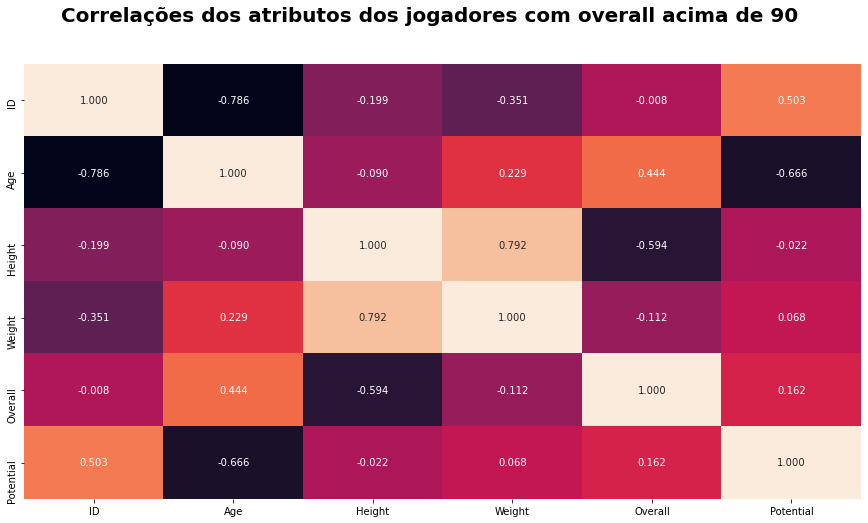

In [9]:
fig, ax=plt.subplots(figsize=(15,8))
plt.suptitle("Correlações dos atributos dos jogadores com overall acima de 90", size=20, weight='bold')
sns.heatmap(df_Tratado[df_Tratado['Overall'] > 90].corr(), annot=True, square=False, fmt='.3f', cbar=False)

<AxesSubplot:>

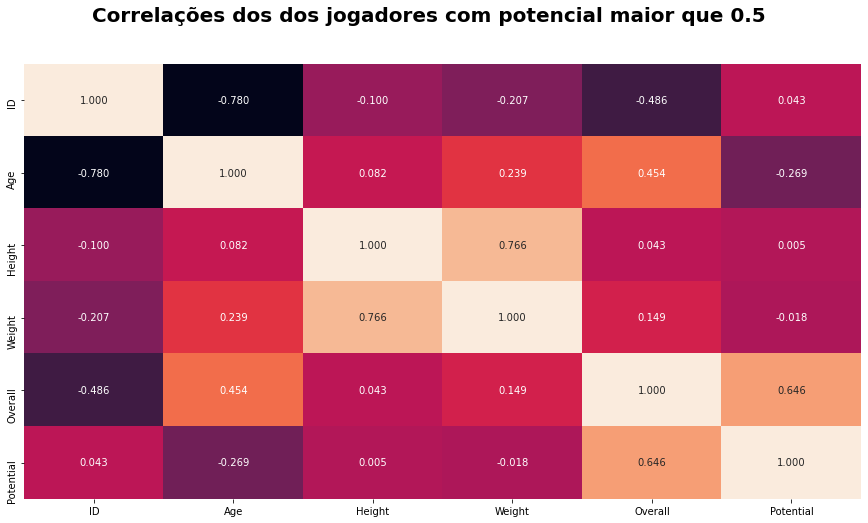

In [10]:
fig, ax=plt.subplots(figsize=(15,8))
plt.suptitle("Correlações dos dos jogadores com potencial maior que 0.5", size=20, weight='bold')
sns.heatmap(df_Tratado[df_Tratado['Potential'] > 0.5].corr(), annot=True, square=False, fmt='.3f', cbar=False)

*Comparando dos dados das colunas Weight e Potential*

In [11]:
df_Potential = df_Tratado.Potential
df_Weight = df_Tratado.Weight
df_ComparacaoWeightPotential = pd.DataFrame(df_Tratado, columns = ['Name', 'Weight', 'Potential'])
print(df_ComparacaoWeightPotential)

                 Name  Weight  Potential
0            L. Messi      72         93
1      R. Lewandowski      81         92
2           K. Mbappé      73         95
3            J. Oblak      87         93
4        K. De Bruyne      70         91
...               ...     ...        ...
19243       A. Shaikh      74         67
19244       N. Saliba      71         69
19245      M. O'Brien      71         61
19246    Wang Shilong      64         60
19247        H. Singh      62         64

[19248 rows x 3 columns]


*Mostrando a relação entre peso e potencial dos jogadores, geralmente quanto maior o peso do jogador menor é o seu potencial*

In [12]:
df_Potential_sort = df_ComparacaoWeightPotential.sort_values('Potential', ascending=False)
df_Potential_sort

,Name,Weight,Potential
2,K. Mbappé,73,95
0,L. Messi,72,93
3,J. Oblak,87,93
20,G. Donnarumma,90,93
22,E. Haaland,94,93
...,...,...,...
19122,Tan Chun Lok,73,51
18913,S. Ghosh,76,51
19026,Song Yue,84,50
19130,Gao Xiang,73,49


In [13]:
df_Weight_sort = df_ComparacaoWeightPotential.sort_values('Weight', ascending=False)
df_Weight_sort

,Name,Weight,Potential
10203,A. Akinfenwa,110,65
11193,C. Seitz,107,64
14049,L. Watkowiak,105,67
7165,O. Oularé,104,71
1988,L. Unnerstall,103,74
...,...,...,...
7466,P. Kun,54,69
10623,O. Sahraoui,53,80
19206,B. Ganesan,52,61
15402,A. Organista,51,68


In [17]:
df_PotentialWeight = (df_Potential_sort, df_Weight_sort)
print(df_PotentialWeight)

(                Name  Weight  Potential
2          K. Mbappé      73         95
0           L. Messi      72         93
3           J. Oblak      87         93
20     G. Donnarumma      90         93
22        E. Haaland      94         93
...              ...     ...        ...
19122   Tan Chun Lok      73         51
18913       S. Ghosh      76         51
19026       Song Yue      84         50
19130      Gao Xiang      73         49
19170     J. Russell      70         49

[19248 rows x 3 columns],                 Name  Weight  Potential
10203   A. Akinfenwa     110         65
11193       C. Seitz     107         64
14049   L. Watkowiak     105         67
7165       O. Oularé     104         71
1988   L. Unnerstall     103         74
...              ...     ...        ...
7466          P. Kun      54         69
10623    O. Sahraoui      53         80
19206     B. Ganesan      52         61
15402   A. Organista      51         68
16280   N. Mehssatou      49         73

[19248 rows

## Gráficos Boxplot separados das duas colunas relacionadas

C:\Users\Thayller\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potential'>

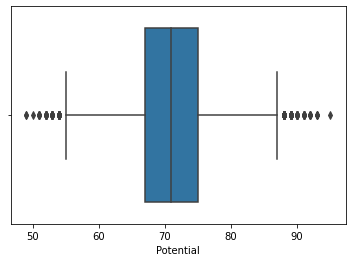

In [22]:
sns.boxplot(df_Potential)

C:\Users\Thayller\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

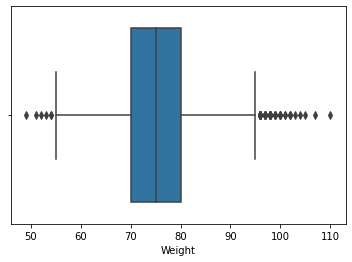

In [23]:
sns.boxplot(df_Weight)

Essa foi uma análise de dados simples sobre uma base de dados de jogadores de futebol.